# Read the Text file

In [2]:
#required Libraries
import re
import pandas as pd


# Reading the Text file 
data=open("Telugu_data_v2.txt",mode='r',encoding='utf-16')
text=data.readlines()
data.close()
text1=[]
for i in text:
    text= re.sub('\u200c','',i)
    text1.append(text)
    
    
# Creating dataframe from the list of paragraphs
df=pd.DataFrame(text1,columns=['text'])
df.head()

,text
0,ఏటీపీ ఫైనల్స్ టోర్నమెంట్లో అయిదుసార్లు ఛాంపియన...
1,ఈ మ్యాచ్లో ఓడినా సెమీస్ చేరేందుకు నొవాక్కు ఇంక...
2,విశాఖ డీజల్ లోకో షెడ్ మరో ఘనతను చాటింది. దేశంల...
3,వైఎస్ వివేకానందరెడ్డి హత్య కేసును సిట్ అధికారు...
4,"కోవిడ్-19 వ్యాధి నిర్ధరణ, చికిత్సకు సంబంధించి ..."


# Pre-Processing Text data

In [3]:
def Tokenization1(text):
    text= re.sub('\u200c','',text)
    L8=[]
    
     
    #for large_quantites
    x='[\d,]+ లక్షల [\d,]+ వేల [\d,]+ మందికి|లక్షా [\d,]+ వేల [\d,]+ మందికి|[\d,]+ లక్షల [\d,]+ వేల [\d,]+'
    L1=re.findall(x,text)
    for i in range(0,len(L1)):
        text=text.replace(str(L1[i]),str("<పెద్ధవిలువలు>"))
    
    #for quantites
    x='[\d,]+ మందికి|[\d,]+ శాతానికి|[\d,]+ శాతం|[\d,]+కి|[\d,]+ మంది|[\d,]+ లక్షలు|[\d,]+ కోట్లు|[\d,]+ వేలు|[\d]+ కేంద్రాల్లో|[\d]+ సెంటర్లలో|[\d,]+ టెస్టులు|[\d,]+ లీటర్ల|[\d]+ గంటలు|కోవిడ్-19|నెం.[\d]+గా'
    L2=re.findall(x,text)
    for i in range(0,len(L2)):
        text=text.replace(str(L2[i]),str("<పరిమాణం>"))

    #for other tokens
    x='\d{1,3}-\d{1,3}తో|[\d]+ను|[\d,]+ డిజిల్|[\d]+లోనే|[\d]+ గంటల|[\d]+ ఓవర్లలో [\d]+ పరుగులు|[\d]+ ఓవర్లలో [\d]+ పరుగుల|[\d]+ బంతుల్లో [\d]+ పరుగులు|\d+ బంతుల్లో|[\d]+ మీటర్లు|\d+ పరుగులకు|\d+ పరుగులు'
    L7=re.findall(x,text)
    for i in range(0,len(L7)):
        text=text.replace(str(L7[i]),str("<తదితర>"))
        

    #for abbriviations
    x='([అ-హ][\W]\.[అ-హ][\W]\.+[\S]+)'
    L3=re.findall(x,text)
    for i in range(0,len(L3)):
        text=text.replace(str(L3[i]),str("<సంక్షిప్తాల>"))
        
    #for fractions
    x='\d+\.\d+శాతంగా|\d+\.\d+శాతం|\d+\.\d+|\d+\/\d+తో|\d+\/\d+|\d+x\d+'
    L4=re.findall(x,text)
    for i in range(0,len(L4)):
        text=text.replace(str(L4[i]),str("<దశాంశ_సంఖ్యలు>"))
        
    #for name-number type
    x=' [అ-హ\ఁ\ం\ః\ా-ౠ\s]{2,11}\(\d+\)గా| [అ-హ\ఁ\ం\ః\ా-ౠ\s]{2,11}\(\d+\)'
    L5=re.findall(x,text)
    for i in range(0,len(L5)):
        text=text.replace(str(L5[i]),str(" <పేరు_సంఖ్యలు>"))
    
    ##Dates 
    x='\d+ జనవరి \d+|\d+ ఫిబ్రవరి \d+|\d+ మార్చి \d+|\d+ ఏప్రిల్ \d+|\d+ మే \d+|\d+ జూన్ \d+|\d+ జూలై \d+'
    y='\d+ ఆగష్టు \d|\d+ సెప్టెంబర్ \d+|\d+ అక్టోబర్ \d+|\d+ నవంబర్ \d+|\d+ డిసెంబర్ \d+'
    p1 = re.findall(x,text)
    p2 = re.findall(y,text)
    L8 = p1 + p2
    for i in range(0,len(L8)):
        text=text.replace(str(L8[i]),str('<తేది>'))  
    
    #for integers
    x='రూ. [\d,]+వేలు'
    L6=re.findall(x,text)
    for i in range(0,len(L6)):
        text=text.replace(str(L6[i]),str("<సంఖ్యలు>"))
    
       

    # Pre-processing
    text=text.replace('...',',')
    clean_text=re.sub('[:""/)(?,-]',' ',text)
    clean_text= re.sub('\n',' ',clean_text)
    clean_text= re.sub('[a-zA-Z]','',clean_text)
    List2=clean_text.split()
    
    #Replacing with original tokens
    k=0
    l=0
    m=0
    n=0
    o=0
    x=0
    p=0 
    for j in List2:
        if j == '<పెద్ధవిలువలు>':
            List2[List2.index(j)]=L1[k]
            k=k+1
        if j == '<పరిమాణం>':
            List2[List2.index(j)]=L2[l]
            l=l+1
        if j == '<సంక్షిప్తాల>':
            List2[List2.index(j)]=L3[m]
            m=m+1
        if j == '<దశాంశ_సంఖ్యలు>':
            List2[List2.index(j)]=L4[n]
            n=n+1
        if j == '<పేరు_సంఖ్యలు>':
            List2[List2.index(j)]=L5[x]
            x=x+1            
        if j == '<సంఖ్యలు>':
            List2[List2.index(j)]=L6[o]
            o=o+1
        if (j=="<తదితర>"):
            List2[List2.index(j)]=L7[p]
            p=p+1 
            
    para=' '.join(List2)
  
    return para

# Sentencification

In [5]:
sentences=[]
for i in range(len(df)):
    p=[]
    tokens=[]
    lines =Tokenization1(df['text'][i]).split('.')
    for i in range(len(lines)):
        if (lines[i]!=''):
            p.append(lines[i])
    
    for i in p[:]:
        k=i.split()
        tokens.append(k)
    for j in tokens:
        j.insert(0,'<s>')
        j.append('</s>')
    sentences=sentences+tokens
    tokens.clear()


In [6]:
# creating an empty dataframe
dataset = pd.DataFrame()

dataset['sentence']=sentences
print('Total Number of sentences:',len(dataset))
dataset.head()


Total Number of sentences: 1124


,sentence
0,"[<s>, ఏటీపీ, ఫైనల్స్, టోర్నమెంట్లో, అయిదుసార్ల..."
1,"[<s>, ఈ, సెర్బియా, స్టార్కు, ఝలక్, ఇస్తూ, రష్య..."
2,"[<s>, గురువారం, జరిగిన, పురుషుల, సింగిల్స్, గ్..."
3,"[<s>, ఈ, మ్యాచ్లో, ఓడినా, సెమీస్, చేరేందుకు, న..."
4,"[<s>, అందుకు, అతను, శుక్రవారం, జరిగే, పోరులో, ..."


## Spliting the data into Train,Test and Valis

In [7]:
from sklearn.model_selection import train_test_split as tts
train1,test = tts( dataset , test_size = 0.2 , random_state = 9)
train,valid = tts(train1, test_size = 0.2 , random_state = 9,)

In [8]:

train.shape, test.shape, valid.shape

((719, 1), (225, 1), (180, 1))

In [9]:
train_ =train.reset_index()
train1 = train_.drop(['index'], axis=1,)
train1

,sentence
0,"[<s>, తొమ్మిది, సంవత్సరాల, వయసున్న, ఈ, వృషభం, ..."
1,"[<s>, వైద్యుల, సలహాలు, పాటిస్తూ, వారం, రోజుల్ల..."
2,"[<s>, ఐఎస్బీ, తరహాలో, ప్రపంచవ్యాప్తంగా, 33, దే..."
3,"[<s>, ప్రపంచవ్యాప్తంగా, కరోనా, విలయం, కొనసాగుత..."
4,"[<s>, మద్యంతో, పాటు, సారాబట్టీ, వస్తువులను, స్..."
...,...
714,"[<s>, ఈ, అత్యున్నత, పదవిని, ఎలా, నిర్వహిస్తాడన..."
715,"[<s>, సాహా, </s>]"
716,"[<s>, 7, బంతుల్లో, 6, పరుగులు, చేయాల్సిన, దశలో..."
717,"[<s>, 24, కళలు, చెమట, చిందిస్తే, సినిమా, అవుతు..."


In [10]:
test_ =test.reset_index()
test_set = test_.drop(['index'], axis=1)
test_set

,sentence
0,"[<s>, భారత, క్రికెట్, నియంత్రణ, మండలి, బీసీసీఐ..."
1,"[<s>, అతడిని, ఫినిషర్గా, చూడటం, ఆనందంగా, ఉంది,..."
2,"[<s>, గ్రామాల, వారిగా, జిల్లా, రిసోర్స్, పర్సన..."
3,"[<s>, గతేడాది, సీజన్, ఆరంభంలో, క్వింటాకు, రూ, ..."
4,"[<s>, ఓ, ప్రాతిపదిక, మీద, నిర్ణయాలు, ఉండాలని, ..."
...,...
220,"[<s>, హాకీలో, ధ్యాన్చంద్, ప్రతిభను, ప్రపంచమంతా..."
221,"[<s>, మరి, ఈ, సందర్భాలను, మన, కథానాయికలు, ఎలా,..."
222,"[<s>, ధన్యవాదాలు, స్విట్జర్లాండ్, </s>]"
223,"[<s>, ఆలయాల్లో, కొవిడ్, నిబంధనల, ప్రకారమే, పది..."


In [11]:
valid_ =valid.reset_index()
valid_set = valid_.drop(['index'], axis=1)
valid_set

,sentence
0,"[<s>, 1030, మద్యం, సీసాలను, స్వాధీనం, చేసుకొని..."
1,"[<s>, నదులు, చెరువుల్లోనూ, నిమజ్జనానికి, అనుమత..."
2,"[<s>, 2011, నుంచి, ఇప్పటివరకూ, ఈ, వేదికలో, ఢిల..."
3,"[<s>, కొవిడ్, నేపథ్యంలో, కొన్ని, నెలలుగా, అనేక..."
4,"[<s>, ఐరోపాలోని, మిగతా, దేశాలు, నియంత్రణ, చర్య..."
...,...
175,"[<s>, వైకాపా, ప్రభుత్వం, అప్పగింతకు, సిద్ధమైంద..."
176,"[<s>, గ్రామాల్లో, ఎటువంటి, అసాంఘిక, కార్యకలాపా..."
177,"[<s>, ప్రధాన, వాణిజ్య, పంటగా, ఉన్న, పత్తికి, ఆ..."
178,"[<s>, రాస్, టేలర్, 69, పరుగులు, చేశాడు, </s>]"


In [12]:
## Creating Unigrams,Bigrams and Trigrams For given sentences

In [13]:
def create_unigram(tokens):
    L=[]
    List1=[]
    bigram=[]

    for i in range(len(tokens)):
        List1.append(tokens[i:i+1])
    for j in range(0,len(List1[0])-1):
        L.append(List1[0][0:j+1])
    Total=L+List1
    L.clear()
    List1.clear()
    bigram=bigram+Total
    return bigram

def create_bigram(tokens):
    L=[]
    List1=[]
    bigram=[]

    for i in range(len(tokens)-1):
        List1.append(tokens[i:i+2])
    for j in range(0,len(List1[0])-1):
        L.append(List1[0][0:j+1])
    Total=L+List1
    L.clear()
    List1.clear()
    bigram=bigram+Total
    return bigram

def create_trigram(tokens):
    L=[]
    List1=[]
    bigram=[]

    for i in range(len(tokens)-2):
        List1.append(tokens[i:i+3])
    for j in range(0,len(List1[0])-1):
        L.append(List1[0][0:j+1])
    Total=L+List1
    L.clear()
    List1.clear()
    bigram=bigram+Total
    return bigram

In [14]:
test_set['unigrams']=test_set['sentence'].apply(create_unigram)
test_set['bigrams']=test_set['sentence'].apply(create_bigram)
test_set['trigrams']=test_set['sentence'].apply(create_trigram)

In [15]:
train1['unigrams']=train1['sentence'].apply(create_unigram)
train1['bigrams']=train1['sentence'].apply(create_bigram)
train1['trigrams']=train1['sentence'].apply(create_trigram)

In [16]:
valid_set['unigrams']=valid_set['sentence'].apply(create_unigram)

In [17]:
print('\n')
print("Original Sentence:", ' '.join(test_set['sentence'][0]) )
print('\n')
print("Tokenization:", test_set['sentence'][0])
print('\n')
print("Unigrams:",test_set['unigrams'][0])
print('\n')
print("bigrams:",test_set['bigrams'][0])
print('\n')
print("trigrams:",test_set['trigrams'][0])
print('\n')



Original Sentence: <s> భారత క్రికెట్ నియంత్రణ మండలి బీసీసీఐ నూతన అధ్యక్షుడిగా బాధ్యతలు స్వీకరించడం దాదాపు ఖరారై పోయింది </s>


Tokenization: ['<s>', 'భారత', 'క్రికెట్', 'నియంత్రణ', 'మండలి', 'బీసీసీఐ', 'నూతన', 'అధ్యక్షుడిగా', 'బాధ్యతలు', 'స్వీకరించడం', 'దాదాపు', 'ఖరారై', 'పోయింది', '</s>']


Unigrams: [['<s>'], ['భారత'], ['క్రికెట్'], ['నియంత్రణ'], ['మండలి'], ['బీసీసీఐ'], ['నూతన'], ['అధ్యక్షుడిగా'], ['బాధ్యతలు'], ['స్వీకరించడం'], ['దాదాపు'], ['ఖరారై'], ['పోయింది'], ['</s>']]


bigrams: [['<s>'], ['<s>', 'భారత'], ['భారత', 'క్రికెట్'], ['క్రికెట్', 'నియంత్రణ'], ['నియంత్రణ', 'మండలి'], ['మండలి', 'బీసీసీఐ'], ['బీసీసీఐ', 'నూతన'], ['నూతన', 'అధ్యక్షుడిగా'], ['అధ్యక్షుడిగా', 'బాధ్యతలు'], ['బాధ్యతలు', 'స్వీకరించడం'], ['స్వీకరించడం', 'దాదాపు'], ['దాదాపు', 'ఖరారై'], ['ఖరారై', 'పోయింది'], ['పోయింది', '</s>']]


trigrams: [['<s>'], ['<s>', 'భారత'], ['<s>', 'భారత', 'క్రికెట్'], ['భారత', 'క్రికెట్', 'నియంత్రణ'], ['క్రికెట్', 'నియంత్రణ', 'మండలి'], ['నియంత్రణ', 'మండలి', 'బీసీసీఐ'], ['మండలి', 'బీసీసీఐ',

### Finding Unigram Counts for Test Set

In [18]:
all_words_tra=[]

for i in range(len(train1)):
    all_words_tra= all_words_tra + train1['unigrams'][i]
    
all_words_train=[]
for i in all_words_tra:
    all_words_train.append(tuple(i))
len(all_words_train)

7360

In [19]:
words_dict_train = {}

for word in all_words_train:   
    # check if the word is already in dictionary 
    if word in words_dict_train:
        # increment count of word by 1 
        words_dict_train[word] = words_dict_train[word] + 1
    else:
        # add the word to dictionary with count 1 
        words_dict_train[word] = 1
words_dict_train

{('<s>',): 719,
 ('తొమ్మిది',): 2,
 ('సంవత్సరాల',): 1,
 ('వయసున్న',): 2,
 ('ఈ',): 78,
 ('వృషభం',): 1,
 ('గత',): 7,
 ('రెండు',): 13,
 ('రోజులు',): 4,
 ('అనారోగ్యంతో',): 1,
 ('బాధపడుతుందని',): 1,
 ('పశువైద్యులు',): 1,
 ('చికిత్సను',): 1,
 ('అందించినప్పటికీ',): 1,
 ('ఫలితం',): 3,
 ('లేకపోయిందని',): 1,
 ('యజమాని',): 4,
 ('ఆవేదన',): 3,
 ('చెందారు',): 3,
 ('</s>',): 719,
 ('వైద్యుల',): 2,
 ('సలహాలు',): 2,
 ('పాటిస్తూ',): 3,
 ('వారం',): 4,
 ('రోజుల్లోనే',): 2,
 ('కోలుకుంటున్నారు',): 1,
 ('ఐఎస్బీ',): 2,
 ('తరహాలో',): 1,
 ('ప్రపంచవ్యాప్తంగా',): 3,
 ('33',): 2,
 ('దేశాలలోని',): 1,
 ('1800',): 1,
 ('కుటుంబ',): 10,
 ('వ్యాపారాలపై',): 2,
 ('48',): 2,
 ('విశ్వవిద్యాలయాలు',): 1,
 ('కలసికట్టుగా',): 1,
 ('సర్వే',): 2,
 ('నిర్వహించాయి',): 1,
 ('కరోనా',): 27,
 ('విలయం',): 1,
 ('కొనసాగుతూనే',): 1,
 ('ఉంది',): 7,
 ('మద్యంతో',): 1,
 ('పాటు',): 9,
 ('సారాబట్టీ',): 1,
 ('వస్తువులను',): 1,
 ('స్వాధీనం',): 2,
 ('చేసుకున్నామని',): 1,
 ('నిందితుడి',): 1,
 ('అరెస్టు',): 1,
 ('చేశామని',): 2,
 ('ప్రత్యేక',): 7,
 ('ఎ

In [20]:
all_word=[]

for i in range(len(test_set)):
    all_word= all_word + test_set['unigrams'][i]

all_words=[]
for i in all_word:
    all_words.append(tuple(i))


words_dict = {}

for word in all_words:   
    # check if the word is already in dictionary 
    if word in all_words_train:
        # increment count of word by 1 
        words_dict[word] = words_dict_train[word]
    else:
        # add the word to dictionary with count 1 
        words_dict[word] = 0
words_dict

{('<s>',): 719,
 ('భారత',): 4,
 ('క్రికెట్',): 7,
 ('నియంత్రణ',): 0,
 ('మండలి',): 0,
 ('బీసీసీఐ',): 3,
 ('నూతన',): 2,
 ('అధ్యక్షుడిగా',): 1,
 ('బాధ్యతలు',): 0,
 ('స్వీకరించడం',): 0,
 ('దాదాపు',): 2,
 ('ఖరారై',): 0,
 ('పోయింది',): 0,
 ('</s>',): 719,
 ('అతడిని',): 1,
 ('ఫినిషర్గా',): 0,
 ('చూడటం',): 0,
 ('ఆనందంగా',): 0,
 ('ఉంది',): 7,
 ('గ్రామాల',): 1,
 ('వారిగా',): 0,
 ('జిల్లా',): 25,
 ('రిసోర్స్',): 0,
 ('పర్సన్ల',): 0,
 ('పరిశీలనలో',): 0,
 ('వచ్చిన',): 8,
 ('సాంకేతిక',): 0,
 ('సమస్యలపై',): 1,
 ('క్షేత్ర',): 0,
 ('సహాయకుల',): 0,
 ('వివరణ',): 0,
 ('తీసుకున్నారు',): 0,
 ('గతేడాది',): 4,
 ('సీజన్',): 1,
 ('ఆరంభంలో',): 0,
 ('క్వింటాకు',): 0,
 ('రూ',): 12,
 ('ఓ',): 23,
 ('ప్రాతిపదిక',): 0,
 ('మీద',): 0,
 ('నిర్ణయాలు',): 1,
 ('ఉండాలని',): 1,
 ('కోర్టు',): 3,
 ('వ్యాఖ్యానించింది',): 0,
 ('హైదరాబాద్',): 2,
 ('మహానగర',): 0,
 ('పాలకసంస్థ',): 0,
 ('ఎన్నికల',): 3,
 ('పర్వంలో',): 0,
 ('అత్యంత',): 0,
 ('కీలకమైన',): 0,
 ('ఘట్టమైన',): 0,
 ('పోలింగ్',): 8,
 ('మంగళవారం',): 1,
 ('జరగనుంది',): 1,
 ('ఈ',

In [21]:
# Total Vocabulary size and Unique Vocabulary size
N_uni=len(all_words)
V_uni=len(words_dict) # Unique words
N_uni,V_uni


(2311, 1448)

In [22]:
# prepare a dataframe
words_df1 = pd.DataFrame({'word':list(words_dict.keys()), 'count':list(words_dict.values())})

# sort words by their count in increasing order
words_df1 = words_df1.sort_values(by = ['count'])

# reset dataframe index
words_df1.reset_index(inplace = True, drop=True)

words_df1.head()

,word,count
0,"('సోగ్గాడే,)",0
1,"(ఎవరినీ,)",0
2,"(కలవకుండా,)",0
3,"(స్వీయ,)",0
4,"(నిర్బంధంలో,)",0


### Finding Bigram Counts for Test data

In [23]:
#train set count
bigrams_train=[]

for i in train1['bigrams']:
    bigrams_train=bigrams_train+i

words_dict2_train = {}

for word in bigrams_train:   
    # check if the word is already in dictionary 
    if tuple(word) in words_dict2_train:
        # increment count of word by 1 
        words_dict2_train[tuple(word)] = words_dict2_train[tuple(word)] + 1
    else:
        # add the word to dictionary with count 1 
        words_dict2_train[tuple(word)] = 1
words_dict2_train

{('<s>',): 719,
 ('<s>', 'తొమ్మిది'): 1,
 ('తొమ్మిది', 'సంవత్సరాల'): 1,
 ('సంవత్సరాల', 'వయసున్న'): 1,
 ('వయసున్న', 'ఈ'): 1,
 ('ఈ', 'వృషభం'): 1,
 ('వృషభం', 'గత'): 1,
 ('గత', 'రెండు'): 1,
 ('రెండు', 'రోజులు'): 1,
 ('రోజులు', 'అనారోగ్యంతో'): 1,
 ('అనారోగ్యంతో', 'బాధపడుతుందని'): 1,
 ('బాధపడుతుందని', 'పశువైద్యులు'): 1,
 ('పశువైద్యులు', 'చికిత్సను'): 1,
 ('చికిత్సను', 'అందించినప్పటికీ'): 1,
 ('అందించినప్పటికీ', 'ఫలితం'): 1,
 ('ఫలితం', 'లేకపోయిందని'): 1,
 ('లేకపోయిందని', 'యజమాని'): 1,
 ('యజమాని', 'ఆవేదన'): 1,
 ('ఆవేదన', 'చెందారు'): 1,
 ('చెందారు', '</s>'): 3,
 ('<s>', 'వైద్యుల'): 2,
 ('వైద్యుల', 'సలహాలు'): 2,
 ('సలహాలు', 'పాటిస్తూ'): 1,
 ('పాటిస్తూ', 'వారం'): 1,
 ('వారం', 'రోజుల్లోనే'): 1,
 ('రోజుల్లోనే', 'కోలుకుంటున్నారు'): 1,
 ('కోలుకుంటున్నారు', '</s>'): 1,
 ('<s>', 'ఐఎస్బీ'): 1,
 ('ఐఎస్బీ', 'తరహాలో'): 1,
 ('తరహాలో', 'ప్రపంచవ్యాప్తంగా'): 1,
 ('ప్రపంచవ్యాప్తంగా', '33'): 1,
 ('33', 'దేశాలలోని'): 1,
 ('దేశాలలోని', '1800'): 1,
 ('1800', 'కుటుంబ'): 1,
 ('కుటుంబ', 'వ్యాపారాలపై'): 2,
 ('వ్యాపారాల

In [24]:
bigram=[]

for i in test_set['bigrams']:
    bigram=bigram+i

bigrams=[]

for i in bigram:
    if len(i) == 2:
        bigrams.append(i)

In [25]:
words_dict2 = {}

for word in bigrams:   
    # check if the word is already in dictionary 
    if tuple(word) in words_dict2_train:
        # increment count of word by 1 
        words_dict2[tuple(word)] = words_dict2_train[tuple(word)]
    else:
        # add the word to dictionary with count 1 
        words_dict2[tuple(word)] = 0
words_dict2

{('<s>', 'భారత'): 1,
 ('భారత', 'క్రికెట్'): 0,
 ('క్రికెట్', 'నియంత్రణ'): 0,
 ('నియంత్రణ', 'మండలి'): 0,
 ('మండలి', 'బీసీసీఐ'): 0,
 ('బీసీసీఐ', 'నూతన'): 0,
 ('నూతన', 'అధ్యక్షుడిగా'): 0,
 ('అధ్యక్షుడిగా', 'బాధ్యతలు'): 0,
 ('బాధ్యతలు', 'స్వీకరించడం'): 0,
 ('స్వీకరించడం', 'దాదాపు'): 0,
 ('దాదాపు', 'ఖరారై'): 0,
 ('ఖరారై', 'పోయింది'): 0,
 ('పోయింది', '</s>'): 0,
 ('<s>', 'అతడిని'): 1,
 ('అతడిని', 'ఫినిషర్గా'): 0,
 ('ఫినిషర్గా', 'చూడటం'): 0,
 ('చూడటం', 'ఆనందంగా'): 0,
 ('ఆనందంగా', 'ఉంది'): 0,
 ('ఉంది', '</s>'): 7,
 ('<s>', 'గ్రామాల'): 0,
 ('గ్రామాల', 'వారిగా'): 0,
 ('వారిగా', 'జిల్లా'): 0,
 ('జిల్లా', 'రిసోర్స్'): 0,
 ('రిసోర్స్', 'పర్సన్ల'): 0,
 ('పర్సన్ల', 'పరిశీలనలో'): 0,
 ('పరిశీలనలో', 'వచ్చిన'): 0,
 ('వచ్చిన', 'సాంకేతిక'): 0,
 ('సాంకేతిక', 'సమస్యలపై'): 0,
 ('సమస్యలపై', 'క్షేత్ర'): 0,
 ('క్షేత్ర', 'సహాయకుల'): 0,
 ('సహాయకుల', 'వివరణ'): 0,
 ('వివరణ', 'తీసుకున్నారు'): 0,
 ('తీసుకున్నారు', '</s>'): 0,
 ('<s>', 'గతేడాది'): 3,
 ('గతేడాది', 'సీజన్'): 0,
 ('సీజన్', 'ఆరంభంలో'): 0,
 ('ఆరంభంలో', 'క్వ

In [26]:
V_Bi=len(words_dict2)
N_Bi=len(bigrams)
V_Bi,N_Bi

(1985, 2086)

In [27]:
# prepare a dataframe
words_df2 = pd.DataFrame({'word':list(words_dict2.keys()), 'count':list(words_dict2.values())})

# sort words by their count in increasing order
words_df2 = words_df2.sort_values(by = ['count'])

# reset dataframe index
words_df2.reset_index(inplace = True, drop=True)

## Finding trigram count for test data

In [28]:
trigram_train=[]

for i in train1['trigrams']:
    trigram_train=trigram_train+i

words_dict3_train = {}

for word in trigram_train:   
    # check if the word is already in dictionary 
    if tuple(word) in words_dict3_train:
        # increment count of word by 1 
        words_dict3_train[tuple(word)] = words_dict3_train[tuple(word)] + 1
    else:
        # add the word to dictionary with count 1 
        words_dict3_train[tuple(word)] = 1


In [29]:
trigram=[]

for i in test_set['trigrams']:
    trigram=trigram+i

trigrams=[]

for i in trigram:
    if len(i) == 3:
        trigrams.append(i)
 

In [30]:
words_dict3 = {}

for word in trigrams:   
    # check if the word is already in dictionary 
    if tuple(word) in words_dict3_train:
        # increment count of word by 1 
        words_dict3[tuple(word)] = words_dict3_train[tuple(word)]
    else:
        # add the word to dictionary with count 1 
        words_dict3[tuple(word)] = 0


In [31]:
V_tri=len(words_dict3)
N_tri=len(trigrams)
V_tri,N_tri

(1845, 1861)

In [32]:
# prepare a dataframe
words_df3 = pd.DataFrame({'word':list(words_dict3.keys()), 'count':list(words_dict3.values())})

# sort words by their count in increasing order
words_df3 = words_df3.sort_values(by = ['count'])

# reset dataframe index
words_df3.reset_index(inplace = True, drop=True)

In [33]:
words_df = pd.concat([words_df1,words_df2,words_df3],axis=0)

In [34]:
words_df.reset_index(drop=True, inplace=True)

In [35]:
words_df

,word,count
0,"('సోగ్గాడే,)",0
1,"(ఎవరినీ,)",0
2,"(కలవకుండా,)",0
3,"(స్వీయ,)",0
4,"(నిర్బంధంలో,)",0
...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7
5274,"(క్లిక్, చేయండి, </s>)",8
5275,"(కోసం, క్లిక్, చేయండి)",8
5276,"(వివరాల, కోసం, క్లిక్)",8


# Applying Smoothing Techniques on tri-grams

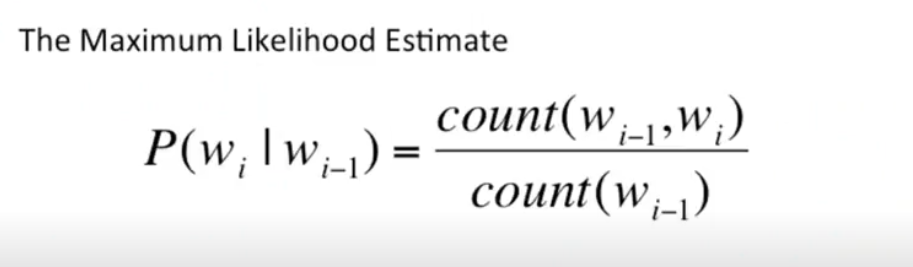

In [36]:
from IPython.display import Image
Image(filename='images/12.png') 

## 1.MLE

In [37]:
## For Conditional Probability
def Con_prob(tokens):
    try:
        p=tokens
        if len(p) == 1:
            Num=int(words_df[words_df['word']==p]['count'])
            out=(Num)/V_uni        

        if len(p) == 2:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==tuple([p[-1]])]['count']) # Given Bigrams Count
            out=Num/Den
            
        if len(p) == 3:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==p[:2]]['count']) # Given Bigrams Count
            out=Num/Den
            
    except ZeroDivisionError:
        out=0
    
    return out

In [38]:
words_df['MLE']=words_df['word'].apply(Con_prob)
words_df

,word,count,MLE
0,"('సోగ్గాడే,)",0,0.0
1,"(ఎవరినీ,)",0,0.0
2,"(కలవకుండా,)",0,0.0
3,"(స్వీయ,)",0,0.0
4,"(నిర్బంధంలో,)",0,0.0
...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0
5274,"(క్లిక్, చేయండి, </s>)",8,1.0
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0


In [39]:
words_df['MLE'].value_counts()

0.000000    4330
0.000691     247
0.001381     149
1.000000     111
0.002072      90
            ... 
0.009669       1
0.153846       1
0.222222       1
0.888889       1
0.833333       1
Name: MLE, Length: 80, dtype: int64

## 2.ADD-1 Smoothing

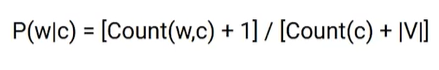

In [40]:
Image(filename='images/21.png')

In [41]:
## For Conditional Probability
def Addone_prob(tokens):
    try:
        p=tokens
        if len(p) == 1:
            Num=int(words_df[words_df['word']==p]['count'])
            out=(Num+1)/(V_uni)        

        if len(p) == 2:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==tuple([p[-1]])]['count']) # Given Bigrams Count
            out=(Num+1)/(Den+V_Bi)
            
        if len(p) == 3:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==p[:2]]['count']) # Given Bigrams Count
            out=(Num+1)/(Den+V_tri)
            
    except ZeroDivisionError:
        out=0
    
    return out

In [42]:
words_df['ADD-1_Smoothing']=words_df['word'].apply(Addone_prob)
words_df

,word,count,MLE,ADD-1_Smoothing
0,"('సోగ్గాడే,)",0,0.0,0.000691
1,"(ఎవరినీ,)",0,0.0,0.000691
2,"(కలవకుండా,)",0,0.0,0.000691
3,"(స్వీయ,)",0,0.0,0.000691
4,"(నిర్బంధంలో,)",0,0.0,0.000691
...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0,0.004320
5274,"(క్లిక్, చేయండి, </s>)",8,1.0,0.004857
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0,0.004857
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0,0.004857


## 3.ADDITIVE SMOOTHING

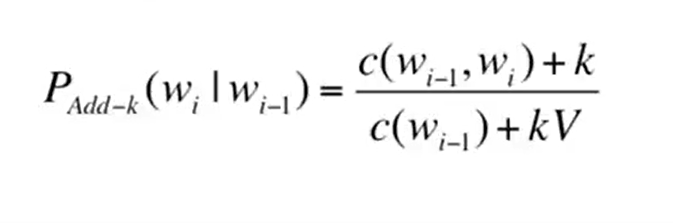

In [43]:
Image(filename='images/11.png')

In [44]:
## For Conditional Probability
def AddK_prob(tokens):
    try:
        p=tokens
        K=0.8
        if len(p) == 1:
            Num=int(words_df[words_df['word']==p]['count'])
            out=(Num+K)/(N_uni+(K*V_uni))       

        if len(p) == 2:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==tuple([p[-1]])]['count']) # Given Bigrams Count
            out=(Num+K)/(Den+(K*V_Bi))
            
        if len(p) == 3:
            Num=int(words_df[words_df['word']==p]['count']) #Trigrams Count
            Den=int(words_df[words_df['word']==p[:2]]['count']) # Given Bigrams Count
            out=(Num+K)/(Den+(K*V_tri))
            
    except ZeroDivisionError:
        out=0
    
    return out

In [45]:
words_df['ADD-K_Smoothing']=words_df['word'].apply(AddK_prob)

In [46]:
words_df

,word,count,MLE,ADD-1_Smoothing,ADD-K_Smoothing
0,"('సోగ్గాడే,)",0,0.0,0.000691,0.000231
1,"(ఎవరినీ,)",0,0.0,0.000691,0.000231
2,"(కలవకుండా,)",0,0.0,0.000691,0.000231
3,"(స్వీయ,)",0,0.0,0.000691,0.000231
4,"(నిర్బంధంలో,)",0,0.0,0.000691,0.000231
...,...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0,0.004320,0.005260
5274,"(క్లిక్, చేయండి, </s>)",8,1.0,0.004857,0.005930
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0,0.004857,0.005930
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0,0.004857,0.005930


## 4.Good Turing Smoothing

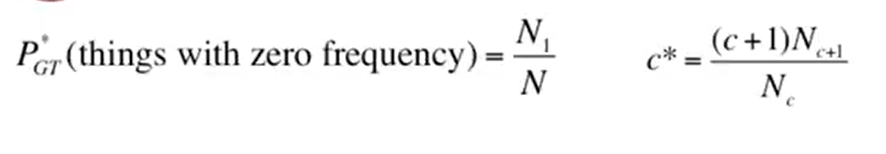

In [47]:
Image(filename='images/22.png')

### Caliculating the count of frequencies

In [48]:
count=words_df3['count'].value_counts(sort=False)
freq_count_tri =count.to_frame()
L_tri=list(freq_count_tri.index)

count=words_df2['count'].value_counts(sort=False)
freq_count_bi =count.to_frame()
L_bi=list(freq_count_bi.index)

count=words_df1['count'].value_counts(sort=False)
freq_count_uni=count.to_frame()
L_uni=list(freq_count_uni.index)

In [49]:
L_tri

[0, 1, 2, 3, 4, 7, 8]

In [50]:
print('\n')
print("Frequencies counts of Trigrams")
freq_count_tri



Frequencies counts of Trigrams


,count
0,1790
1,37
2,8
3,4
4,1
7,1
8,4


In [51]:
import random

In [52]:
def frk_count_tri(num):
    if num in L_tri:
        out = freq_count_tri['count'][num]
    else:
        out = random.uniform(1,4)
    return out
def frk_count_bi(num):
    if num in L_bi:
        out = freq_count_bi['count'][num]
    else:
        out = random.uniform(1,4)
    return out
def frk_count_uni(num):
    if num in L_uni:
        out = freq_count_uni['count'][num]
    else:
        out = random.uniform(1,4)
    return out

### Good Turing Probability

In [53]:
def gtP(tokens):
    
    if (len(tokens)==1):
        c = words_dict[tokens]
        if c!=0:
            q=frk_count_uni(c+1)
            Num=(c+1)*q                
            Den=frk_count_uni(c)
            c_star= Num/Den
            Pgt = c_star/N_uni
        if c==0:
            Pgt = freq_count_uni['count'][1]/V_uni
        
    if (len(tokens)==2):
        c = words_dict2[tokens]
        if c!=0:
            q=frk_count_bi(c+1)
            Num=(c+1)*q                
            Den=frk_count_bi(c)
            c_star= Num/Den
            Pgt = c_star/V_Bi
        if c==0:
            Pgt = freq_count_bi['count'][1]/V_Bi
             
            
    if (len(tokens)==3):
        c = words_dict3[tokens]
        if c!=0:
            q=frk_count_tri(c+1)
            Num=(c+1)*q                
            Den=frk_count_tri(c)
            c_star= Num/Den
            Pgt = c_star/V_tri
        if c==0:
            Pgt = freq_count_tri['count'][1]/V_tri
          
                
    return Pgt


In [54]:
words_df['Good_Turing_Smoothing']=words_df['word'].apply(gtP)
words_df

,word,count,MLE,ADD-1_Smoothing,ADD-K_Smoothing,Good_Turing_Smoothing
0,"('సోగ్గాడే,)",0,0.0,0.000691,0.000231,0.170580
1,"(ఎవరినీ,)",0,0.0,0.000691,0.000231,0.170580
2,"(కలవకుండా,)",0,0.0,0.000691,0.000231,0.170580
3,"(స్వీయ,)",0,0.0,0.000691,0.000231,0.170580
4,"(నిర్బంధంలో,)",0,0.0,0.000691,0.000231,0.170580
...,...,...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0,0.004320,0.005260,0.017344
5274,"(క్లిక్, చేయండి, </s>)",8,1.0,0.004857,0.005930,0.001899
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0,0.004857,0.005930,0.002886
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0,0.004857,0.005930,0.003919


## 5.Kneyserney

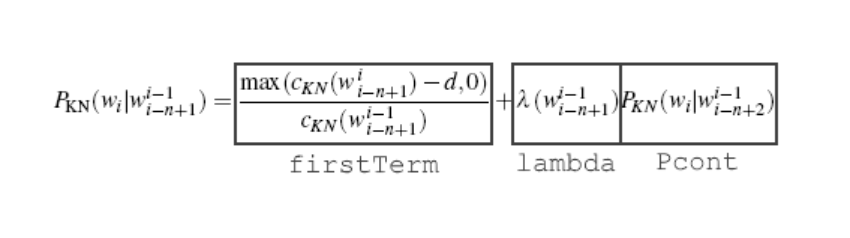

In [55]:
Image(filename='images/44.png')

### Function for finding "given word" similar n-grams

In [56]:
def similar(tokens):
    l=tokens
    
    if (len(l) == 3):
        List_tri=[]
        for i in range(len(words_df3)):
            p= words_df3['word'][i]
            if l[:2] == p[:2]:
                List_tri.append(p)
        out=List_tri
        
    if (len(l) == 2):
        List_bi=[]
        for i in range(len(words_df2)):
            p= words_df2['word'][i]
            if l[:1] == p[:1]:
                List_bi.append(p)
        out=List_bi        
    
    if (len(l) == 1):
        out = [tokens]
        
    return out

In [57]:
new=pd.DataFrame(words_df['word'])
new['count'] = words_df['count']
new.head()

,word,count
0,"('సోగ్గాడే,)",0
1,"(ఎవరినీ,)",0
2,"(కలవకుండా,)",0
3,"(స్వీయ,)",0
4,"(నిర్బంధంలో,)",0


In [58]:
new['given_similar']=words_df['word'].apply(similar)
new

,word,count,given_similar
0,"('సోగ్గాడే,)",0,"[('సోగ్గాడే,)]"
1,"(ఎవరినీ,)",0,"[(ఎవరినీ,)]"
2,"(కలవకుండా,)",0,"[(కలవకుండా,)]"
3,"(స్వీయ,)",0,"[(స్వీయ,)]"
4,"(నిర్బంధంలో,)",0,"[(నిర్బంధంలో,)]"
...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,"[(<s>, పూర్తి, వివరాల)]"
5274,"(క్లిక్, చేయండి, </s>)",8,"[(క్లిక్, చేయండి, </s>)]"
5275,"(కోసం, క్లిక్, చేయండి)",8,"[(కోసం, క్లిక్, చేయండి)]"
5276,"(వివరాల, కోసం, క్లిక్)",8,"[(వివరాల, కోసం, క్లిక్)]"


In [59]:
#Count of that similar words
def similar_count(similar):
    l=similar
    num=1
    for i in range(len(l)):
        num = num + float(new[new['word']==l[i]]['count'])
    return num 

In [60]:
new['similar_count'] = new['given_similar'].apply(similar_count)

In [61]:
#For lamda caliculations we should consider the whole string preceding the final word
def discounted(list):
    return len(list)

In [62]:
new['Preceeding_words'] = new['given_similar'].apply(discounted)

In [63]:
# NEW Dataframe for storing kneserny parts
kneser = pd.DataFrame(words_df['word'])


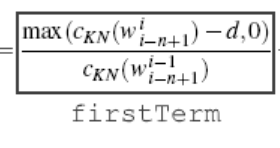

In [64]:
Image(filename='images/2.png')

In [65]:
## For Conditional Probability
def Term1(tokens):
    try:
        p=tokens
        d=0.75
        if len(p) == 1:
            Cuni=int(words_df[words_df['word']==p]['count'])
            out=Cuni/N_uni      

        if len(p) == 2:
            count_bi = int(new[new['word']==p]['count'])
            count_uni  = int(new[new['word']==p]['similar_count'])
            Max_term = max((count_bi-d),0)
            first_term = Max_term/(count_uni*d)
            out=first_term 
            
        if len(p) == 3:
            count_tri = int(new[new['word']==p]['count'])
            count_bi  = int(new[new['word']==p]['similar_count'])
            Max_term = max((count_tri-d),0)
            first_term = Max_term/(count_bi*d)
            out=first_term 
            
    except ZeroDivisionError:
        out=0
    
    return out

In [66]:
kneser['First_Term']=kneser['word'].apply(Term1)

## Lamda Term:

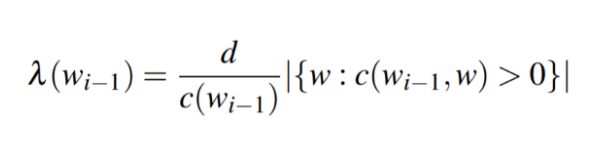

In [67]:
Image(filename='images/3.png')

In [68]:
def LAMDA(trigrams):
    try:
        d=0.75
        p=trigrams
        Cwi = int(new[new['word']==p]['similar_count'])
        Cond  = int(new[new['word']==p]['Preceeding_words'])
        First = d/Cwi
        lamda = First*Cond
    except ZeroDivisionError:
        lamda = 0
    return lamda
    
    

In [69]:
kneser['Lamda_Term']=kneser['word'].apply(LAMDA)


## Pcont

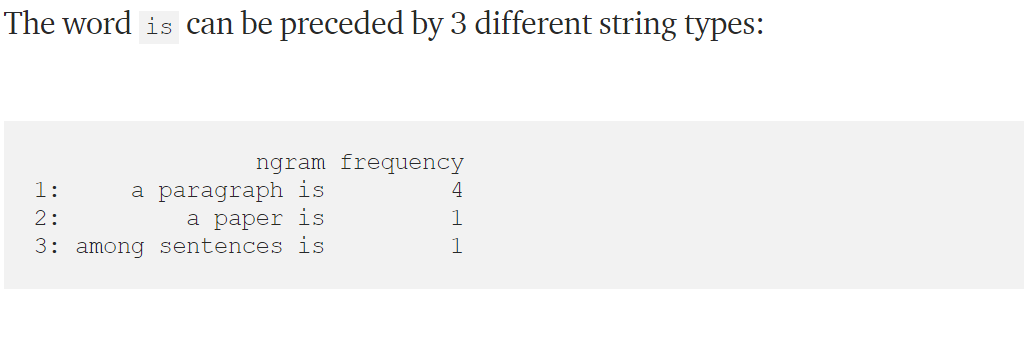

In [70]:
Image(filename='images/4.png')

### Function for finding "Predicted word" similar n-grams

In [71]:
def last_similar(tokens):
    l=tokens
    
    if (len(l) == 3):
        List_tri=[]
        for i in range(len(words_df3)):
            p= words_df3['word'][i]
            if l[-1] == p[-1]:
                List_tri.append(p)
        out=List_tri
        
    if (len(l) == 2):
        List_bi=[]
        for i in range(len(words_df2)):
            p= words_df2['word'][i]
            if l[-1] == p[-1]:
                List_bi.append(p)
        out=List_bi        
    
    if (len(l) == 1):
        out = [tokens]
        
    return out

In [72]:
new['Last_Similar']=new['word'].apply(last_similar)


In [73]:
def last_similar_count(similar):
    l=similar
    num=1
    for i in range(len(l)):
        num = num + float(words_df[words_df['word']==l[i]]['count'])
    return num

In [74]:
new['Last_Similar_Count']=new['Last_Similar'].apply(last_similar_count)
new.head()

,word,count,given_similar,similar_count,Preceeding_words,Last_Similar,Last_Similar_Count
0,"('సోగ్గాడే,)",0,"[('సోగ్గాడే,)]",1.0,1,"[('సోగ్గాడే,)]",1.0
1,"(ఎవరినీ,)",0,"[(ఎవరినీ,)]",1.0,1,"[(ఎవరినీ,)]",1.0
2,"(కలవకుండా,)",0,"[(కలవకుండా,)]",1.0,1,"[(కలవకుండా,)]",1.0
3,"(స్వీయ,)",0,"[(స్వీయ,)]",1.0,1,"[(స్వీయ,)]",1.0
4,"(నిర్బంధంలో,)",0,"[(నిర్బంధంలో,)]",1.0,1,"[(నిర్బంధంలో,)]",1.0


In [75]:
def Pcont(tokens):
    p=tokens
    if (len(tokens)==1):
        Cuni=int(words_df[words_df['word']==p]['count'])
        pcont=(Cuni+0.75)/V_uni
    if (len(tokens)==2):
        Num= float(new[new['word']==p]['Last_Similar_Count'])
        pcont=Num/V_Bi
    if (len(tokens)==3):
        Num= float(new[new['word']==p]['Last_Similar_Count'])
        pcont=Num/V_tri
    return pcont


In [76]:
kneser['PCONT']=new['word'].apply(Pcont)

In [77]:
PKN=[]
for i in range(len(new)):
    final= kneser['First_Term'][i]+(kneser['Lamda_Term'][i]*kneser['PCONT'][i])
    PKN.append(final)

In [78]:
words_df['Pkneser-ney'] = PKN

In [79]:
words_df

,word,count,MLE,ADD-1_Smoothing,ADD-K_Smoothing,Good_Turing_Smoothing,Pkneser-ney
0,"('సోగ్గాడే,)",0,0.0,0.000691,0.000231,0.170580,0.000388
1,"(ఎవరినీ,)",0,0.0,0.000691,0.000231,0.170580,0.000388
2,"(కలవకుండా,)",0,0.0,0.000691,0.000231,0.170580,0.000388
3,"(స్వీయ,)",0,0.0,0.000691,0.000231,0.170580,0.000388
4,"(నిర్బంధంలో,)",0,0.0,0.000691,0.000231,0.170580,0.000388
...,...,...,...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0,0.004320,0.005260,0.017344,1.042073
5274,"(క్లిక్, చేయండి, </s>)",8,1.0,0.004857,0.005930,0.001899,1.075655
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0,0.004857,0.005930,0.002886,1.074481
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0,0.004857,0.005930,0.003919,1.074481


## 6. Witten Bell

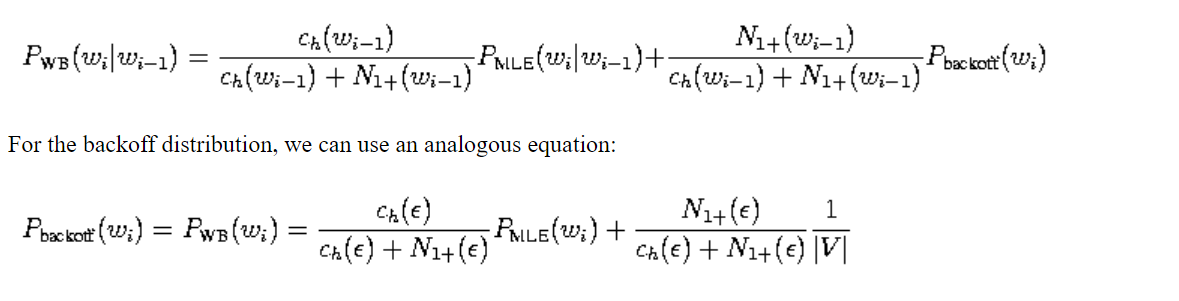

In [80]:
Image(filename='images/5.png')

In [81]:
WB = pd.DataFrame(words_df['word'])

In [82]:
#for caliculating the N1 of uni and bigrams
WB['Given_Similar'] = new['given_similar']
WB['Last_Similar']=new['Last_Similar']


### Function for caliculating more than one frequency counts

In [83]:
def N1(Last):
    t= Last
    a=[]
    for i in t:        
        c = float(new[new['word']==i]['count'])
        if c == 0:
            a.append(0)
        else:
            a.append(1)
    out= sum(a) 
    return out            

In [84]:
N_given=[]
N_pred=[]
for i in range(len(WB)):
        N_given.append(N1(WB['Given_Similar'][i]))
        N_pred.append(N1(WB['Last_Similar'][i]))        


In [85]:
WB['N1_given'] = N_given
WB['N1_pred'] = N_pred

In [86]:
WB

,word,Given_Similar,Last_Similar,N1_given,N1_pred
0,"('సోగ్గాడే,)","[('సోగ్గాడే,)]","[('సోగ్గాడే,)]",0,0
1,"(ఎవరినీ,)","[(ఎవరినీ,)]","[(ఎవరినీ,)]",0,0
2,"(కలవకుండా,)","[(కలవకుండా,)]","[(కలవకుండా,)]",0,0
3,"(స్వీయ,)","[(స్వీయ,)]","[(స్వీయ,)]",0,0
4,"(నిర్బంధంలో,)","[(నిర్బంధంలో,)]","[(నిర్బంధంలో,)]",0,0
...,...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)","[(<s>, పూర్తి, వివరాల)]","[(<s>, పూర్తి, వివరాల)]",1,1
5274,"(క్లిక్, చేయండి, </s>)","[(క్లిక్, చేయండి, </s>)]","[(కుకునూరు, దర్శకుడు, </s>), (మెరుగైన, అవకాశాల...",1,17
5275,"(కోసం, క్లిక్, చేయండి)","[(కోసం, క్లిక్, చేయండి)]","[(కోసం, క్లిక్, చేయండి)]",1,1
5276,"(వివరాల, కోసం, క్లిక్)","[(వివరాల, కోసం, క్లిక్)]","[(వివరాల, కోసం, క్లిక్)]",1,1


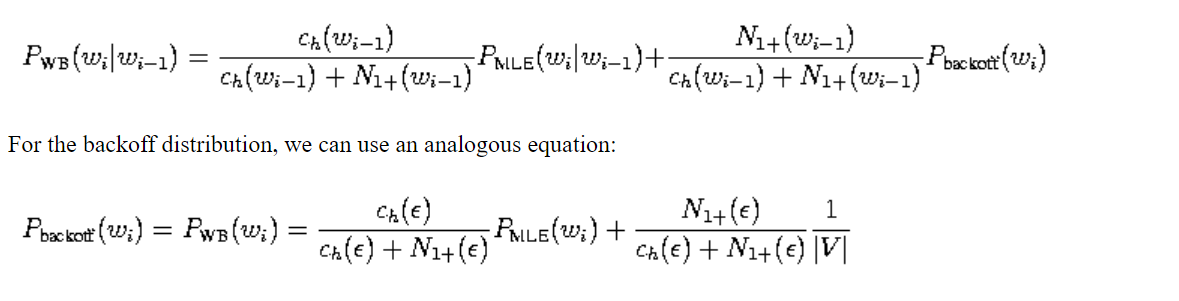

In [87]:
Image(filename='images/5.png')

In [88]:
l=0.001

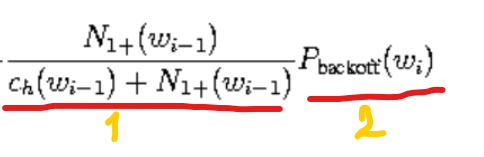

In [89]:
Image(filename='images/7.png')

In [90]:
## For Conditional Probability
def Pbackoff(tokens):
    try:
        
        p=tuple([tokens[-1]])
        C_Uni=float(words_df[words_df['word']==p]['count'])
        N1_uni = float(WB[WB['word']==tokens]['N1_pred'] )
        MLE_Uni = float(words_df[words_df['word']==p]['MLE'])
        Num1=C_Uni
        Den1=C_Uni+N1_uni
        output1 =(Num1/Den1)*MLE_Uni
        
        Num2=N1_uni
        Den2=C_Uni+N1_uni
        output2 =(Num2/Den2)*(1/V_uni)  
        
        output = output1+output2
        
    except ZeroDivisionError:
        output=0
    
    return output

In [91]:
WB_new=pd.DataFrame(WB['word'])

In [92]:
## For Conditional Probability
def SecTerm(tokens):
    try:
        if (len(tokens)==1):
            output= Pbackoff(tokens)
        if (len(tokens)==2):
            p=tuple([tokens[0]])
            C_bi=float(words_df[words_df['word']==p]['count']) #bigram Count
            N1 = float(WB[WB['word']==tokens]['N1_given'])
            MLE_bi = float(words_df[words_df['word']==p]['MLE'])
            Num=N1
            Den=C_bi+N1
            output=(Num/Den)*Pbackoff(tokens)
        if (len(tokens)==3):
            p=tokens[:2]
            C_bi=float(words_df[words_df['word']==p]['count']) #bigram Count
            N1 = float(WB[WB['word']==tokens]['N1_given'])
            MLE_bi = float(words_df[words_df['word']==p]['MLE'])
            Num=N1
            Den=C_bi+N1
            output=(Num/Den)*Pbackoff(tokens)        
        
    except ZeroDivisionError:
        output=0
    
    return output

In [93]:
WB_new['SecondTerm'] = WB_new['word'].apply(SecTerm)

## First Term

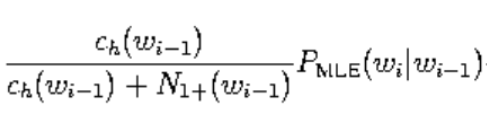

In [94]:
Image(filename='images/6.png')

In [95]:
## For Conditional Probability
def FirstTerm(tokens):
    try:
        if (len(tokens)==1):
            output= 0
        if (len(tokens)==2):
            p=tuple([tokens[0]])
            C_bi=float(words_df[words_df['word']==p]['count']) #bigram Count
            N1 = float(WB[WB['word']==tokens]['N1_given'])
            MLE_bi = float(words_df[words_df['word']==p]['MLE'])
            Num=N1
            Den=C_bi+N1
            output=(Num/Den)*Pbackoff(tokens)
        if (len(tokens)==3):
            p=tokens[:2]
            C_bi=float(words_df[words_df['word']==p]['count']) #bigram Count
            N1 = float(WB[WB['word']==tokens]['N1_given'])
            MLE_bi = float(words_df[words_df['word']==p]['MLE'])
            Num=N1
            Den=C_bi+N1
            output=(Num/Den)*Pbackoff(tokens)        
        
    except ZeroDivisionError:
        output=0
    
    return output

In [96]:
WB_new['First_Term']=WB['word'].apply(FirstTerm)

In [97]:
WB_new

,word,SecondTerm,First_Term
0,"('సోగ్గాడే,)",0.000000,0.000000
1,"(ఎవరినీ,)",0.000000,0.000000
2,"(కలవకుండా,)",0.000000,0.000000
3,"(స్వీయ,)",0.000000,0.000000
4,"(నిర్బంధంలో,)",0.000000,0.000000
...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",0.000708,0.000708
5274,"(క్లిక్, చేయండి, </s>)",0.053899,0.053899
5275,"(కోసం, క్లిక్, చేయండి)",0.000554,0.000554
5276,"(వివరాల, కోసం, క్లిక్)",0.000554,0.000554


In [98]:
wb=[]
for i in range(len(WB_new)):
    Pwb= WB_new['SecondTerm'][i]+WB_new['First_Term'][i]+l
    wb.append(Pwb)
WB_new['Witten_Bell']=wb


In [99]:
words_df['Witten_Bell']=WB_new['Witten_Bell']
words_df

,word,count,MLE,ADD-1_Smoothing,ADD-K_Smoothing,Good_Turing_Smoothing,Pkneser-ney,Witten_Bell
0,"('సోగ్గాడే,)",0,0.0,0.000691,0.000231,0.170580,0.000388,0.001000
1,"(ఎవరినీ,)",0,0.0,0.000691,0.000231,0.170580,0.000388,0.001000
2,"(కలవకుండా,)",0,0.0,0.000691,0.000231,0.170580,0.000388,0.001000
3,"(స్వీయ,)",0,0.0,0.000691,0.000231,0.170580,0.000388,0.001000
4,"(నిర్బంధంలో,)",0,0.0,0.000691,0.000231,0.170580,0.000388,0.001000
...,...,...,...,...,...,...,...,...
5273,"(<s>, పూర్తి, వివరాల)",7,1.0,0.004320,0.005260,0.017344,1.042073,0.002416
5274,"(క్లిక్, చేయండి, </s>)",8,1.0,0.004857,0.005930,0.001899,1.075655,0.108799
5275,"(కోసం, క్లిక్, చేయండి)",8,1.0,0.004857,0.005930,0.002886,1.074481,0.002108
5276,"(వివరాల, కోసం, క్లిక్)",8,1.0,0.004857,0.005930,0.003919,1.074481,0.002108


# PEPLEXITY

In [100]:
def Create_Trigram(tokens):
    L=[]
    List1=[]
    bigram=[]

    for i in range(len(tokens)-2):
        List1.append(tokens[i:i+3])
    for j in range(0,len(List1[0])-1):
        L.append(List1[0][0:j+1])
    Total=L+List1
    L.clear()
    List1.clear()
    bigram=bigram+Total
    tup_tri=[]
    for i in bigram:
        tup_tri.append(tuple(i))
        
    return tup_tri

In [101]:
def nth_root(num,root):
    answer=num**(1/root)
    return answer

In [102]:
t1=test_set['sentence'][98]
t=Create_Trigram(t1)
Prob=[]
for i in t:
    if i ==  ('<s>',):
        P=1
    else:
        P=float(words_df[words_df['word']==i]['Witten_Bell'])
    Prob.append(P)
print("Witten_Bell_Smoothing:", Prob,'\n')
Perp=[]
for i in Prob:
    try:
        Perp.append(1/i)
    except ZeroDivisionError:
        Perp.append(0)
    

Total=1
for i in Perp:
    Total=Total*i


print("Sentence:", ' '.join(t1),'\n')
print("Trigrams:" ,t,'\n')
print("ADD-1_Smoothing:", Prob,'\n')
print('ADD-1 Preplexity:',Perp,'\n')
print('ADD-1 Preplexity_Score:',Total,'\n')
print("Normalized_ADD-1 Preplexity_Score:", nth_root(num=Total,root=len(t)))

Witten_Bell_Smoothing: [1, 0.0015101945182498513, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001] 

Sentence: <s> అతడు భారీ సిక్సులు కొడతాడనే విషయం మాకు ముందు నుంచే తెలుసు </s> 

Trigrams: [('<s>',), ('<s>', 'అతడు'), ('<s>', 'అతడు', 'భారీ'), ('అతడు', 'భారీ', 'సిక్సులు'), ('భారీ', 'సిక్సులు', 'కొడతాడనే'), ('సిక్సులు', 'కొడతాడనే', 'విషయం'), ('కొడతాడనే', 'విషయం', 'మాకు'), ('విషయం', 'మాకు', 'ముందు'), ('మాకు', 'ముందు', 'నుంచే'), ('ముందు', 'నుంచే', 'తెలుసు'), ('నుంచే', 'తెలుసు', '</s>')] 

ADD-1_Smoothing: [1, 0.0015101945182498513, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001] 

ADD-1 Preplexity: [1.0, 662.1663553373837, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0] 

ADD-1 Preplexity_Score: 6.621663553373837e+29 

Normalized_ADD-1 Preplexity_Score: 514.0401125948558


In [103]:
Perplexity=pd.DataFrame(test_set['sentence'])
Perplexity['Trigrams'] = Perplexity['sentence'].apply(Create_Trigram)
Perplexity.head()

,sentence,Trigrams
0,"[<s>, భారత, క్రికెట్, నియంత్రణ, మండలి, బీసీసీఐ...","[(<s>,), (<s>, భారత), (<s>, భారత, క్రికెట్), (..."
1,"[<s>, అతడిని, ఫినిషర్గా, చూడటం, ఆనందంగా, ఉంది,...","[(<s>,), (<s>, అతడిని), (<s>, అతడిని, ఫినిషర్గ..."
2,"[<s>, గ్రామాల, వారిగా, జిల్లా, రిసోర్స్, పర్సన...","[(<s>,), (<s>, గ్రామాల), (<s>, గ్రామాల, వారిగా..."
3,"[<s>, గతేడాది, సీజన్, ఆరంభంలో, క్వింటాకు, రూ, ...","[(<s>,), (<s>, గతేడాది), (<s>, గతేడాది, సీజన్)..."
4,"[<s>, ఓ, ప్రాతిపదిక, మీద, నిర్ణయాలు, ఉండాలని, ...","[(<s>,), (<s>, ఓ), (<s>, ఓ, ప్రాతిపదిక), (ఓ, ప..."


In [104]:
def Perp_Score_add1(sentences):
    try:
        t=sentences
        Prob=[]
        for i in t:
            P=float(words_df[words_df['word']==i]['ADD-1_Smoothing'])
            Prob.append(P)
        Perp=[]
        for i in Prob:
            Perp.append(1/i)
        Total=1
        for i in Perp:
            Total=Total*i
        output = nth_root(num=Total,root=len(t))
    except ZeroDivisionError:
        output=0
    
    return output

In [105]:
Perplexity['Pelplexity_Score_ADD-1'] = Perplexity['Trigrams'].apply(Perp_Score_add1)

In [106]:
def Perp_Score_addk(sentences):
    try:
        t=sentences
        Prob=[]
        for i in t:
            P=float(words_df[words_df['word']==i]['ADD-K_Smoothing'])
            Prob.append(P)
        Perp=[]
        for i in Prob:
            Perp.append(1/i)
        Total=1
        for i in Perp:
            Total=Total*i
        output = nth_root(num=Total,root=len(t))
    except ZeroDivisionError:
        output=0
    
    return output

In [107]:
Perplexity['Pelplexity_Score_ADD-K'] = Perplexity['Trigrams'].apply(Perp_Score_addk)

In [108]:
def Perp_Score_GT(sentences):
    try:
        t=sentences
        Prob=[]
        for i in t:
            P=float(words_df[words_df['word']==i]['Good_Turing_Smoothing'])
            Prob.append(P)
        Perp=[]
        for i in Prob:
            Perp.append(1/i)
        Total=1
        for i in Perp:
            Total=Total*i
        output = nth_root(num=Total,root=len(t))
    except ZeroDivisionError:
        output=0
    
    return output

In [109]:
Perplexity['Pelplexity_Score_GoodTuring'] = Perplexity['Trigrams'].apply(Perp_Score_GT)

In [110]:
def Perp_Score_KN(sentences):
    try:
        t=sentences
        Prob=[]
        for i in t:
            P=float(words_df[words_df['word']==i]['Pkneser-ney'])
            Prob.append(P)
        Perp=[]
        for i in Prob:
            Perp.append(1/i)
        Total=1
        for i in Perp:
            Total=Total*i
        output = nth_root(num=Total,root=len(t))
    except ZeroDivisionError:
        output=0
    
    return output

In [111]:
Perplexity['Pelplexity_Score_kneser-ney'] = Perplexity['Trigrams'].apply(Perp_Score_KN)

In [112]:
def Perp_Score_WB(sentences):
    try:
        t=sentences
        Prob=[]
        for i in t:
            P=float(words_df[words_df['word']==i]['Witten_Bell'])
            Prob.append(P)
        Perp=[]
        for i in Prob:
            Perp.append(1/i)
        Total=1
        for i in Perp:
            Total=Total*i
        output = nth_root(num=Total,root=len(t))
    except ZeroDivisionError:
        output=0
    
    return output

In [113]:
Perplexity['Pelplexity_Score_Witten_Bell'] = Perplexity['Trigrams'].apply(Perp_Score_WB)

In [114]:
Perplexity.head()

,sentence,Trigrams,Pelplexity_Score_ADD-1,Pelplexity_Score_ADD-K,Pelplexity_Score_GoodTuring,Pelplexity_Score_kneser-ney,Pelplexity_Score_Witten_Bell
0,"[<s>, భారత, క్రికెట్, నియంత్రణ, మండలి, బీసీసీఐ...","[(<s>,), (<s>, భారత), (<s>, భారత, క్రికెట్), (...",1084.503360,1144.752738,52.820546,994.134509,626.566911
1,"[<s>, అతడిని, ఫినిషర్గా, చూడటం, ఆనందంగా, ఉంది,...","[(<s>,), (<s>, అతడిని), (<s>, అతడిని, ఫినిషర్గ...",637.340893,710.084426,55.951422,443.567254,405.432214
2,"[<s>, గ్రామాల, వారిగా, జిల్లా, రిసోర్స్, పర్సన...","[(<s>,), (<s>, గ్రామాల), (<s>, గ్రామాల, వారిగా...",1176.588344,1247.197650,36.670045,1126.309333,656.188354
3,"[<s>, గతేడాది, సీజన్, ఆరంభంలో, క్వింటాకు, రూ, ...","[(<s>,), (<s>, గతేడాది), (<s>, గతేడాది, సీజన్)...",577.468540,638.487263,51.439052,336.820968,392.586093
4,"[<s>, ఓ, ప్రాతిపదిక, మీద, నిర్ణయాలు, ఉండాలని, ...","[(<s>,), (<s>, ఓ), (<s>, ఓ, ప్రాతిపదిక), (ఓ, ప...",748.326471,809.346593,51.084993,485.118937,435.117771


In [115]:
s1 = 0
for i in range(0,len(Perplexity)):
               s1=s1+ Perplexity['Pelplexity_Score_ADD-1'][i]
A1=s1/len(Perplexity)
A1

823.8957977608034

In [116]:
s1 = 0
for i in range(0,len(Perplexity)):
               s1=s1+ Perplexity['Pelplexity_Score_ADD-K'][i]
A2=s1/len(Perplexity)
A2

892.4278972098725

In [117]:
s1 = 0
for i in range(0,len(Perplexity)):
               s1=s1+ Perplexity['Pelplexity_Score_GoodTuring'][i]
A3=s1/len(Perplexity)
A3

44.182046668688066

In [118]:
s1 = 0
for i in range(0,len(Perplexity)):
               s1=s1+ Perplexity['Pelplexity_Score_kneser-ney'][i]
A4=s1/len(Perplexity)
A4

667.5938612753929

In [119]:
s1 = 0
for i in range(0,len(Perplexity)):
               s1=s1+ Perplexity['Pelplexity_Score_Witten_Bell'][i]
A5=s1/len(Perplexity)
A5

468.3296263322512

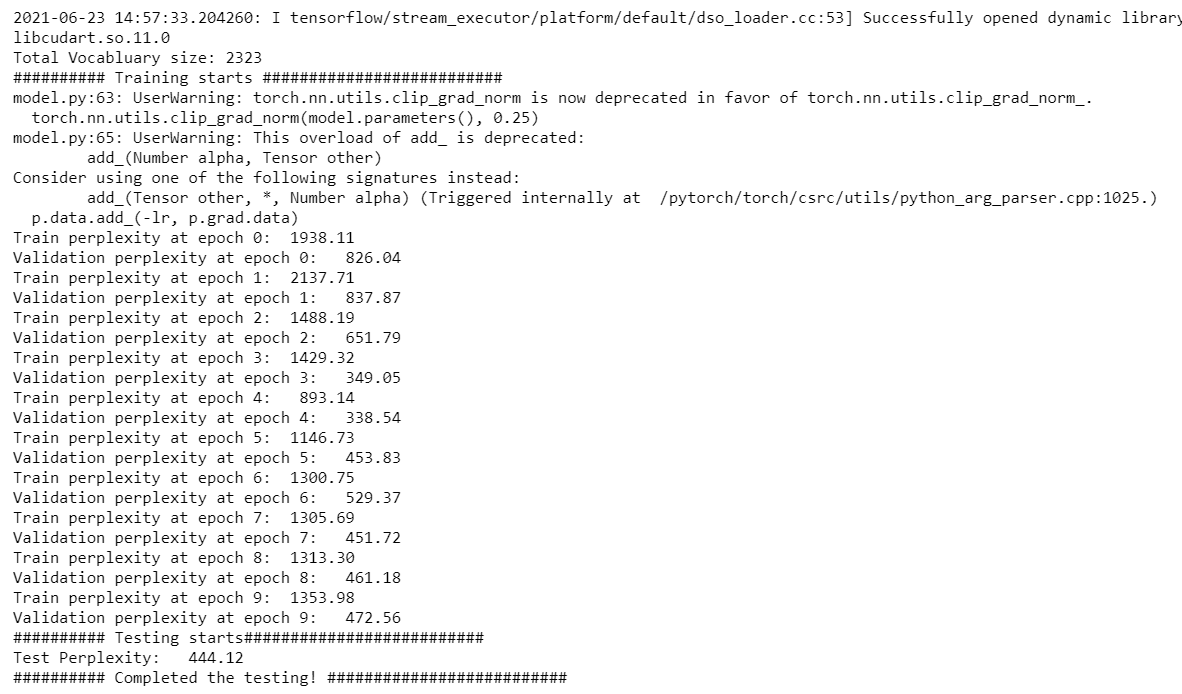

In [120]:
Image(filename='images/Final Neural Models.png')

In [121]:
NAMES=['Pelplexity_Score_ADD-1','Pelplexity_Score_ADD-K','Pelplexity_Score_GoodTuring','Pelplexity_Score_kneser-ney','Pelplexity_Score_Witten_Bell','Neural Model']

In [122]:
SCORES=[A1,A2,A3,A4,A5,444.12]
SCORES

[823.8957977608034,
 892.4278972098725,
 44.182046668688066,
 667.5938612753929,
 468.3296263322512,
 444.12]

In [123]:
Final_scores=pd.DataFrame()

In [124]:
Final_scores['NAMES']=NAMES
Final_scores['SCORES']=SCORES

In [125]:
Final_scores

,NAMES,SCORES
0,Pelplexity_Score_ADD-1,823.895798
1,Pelplexity_Score_ADD-K,892.427897
2,Pelplexity_Score_GoodTuring,44.182047
3,Pelplexity_Score_kneser-ney,667.593861
4,Pelplexity_Score_Witten_Bell,468.329626
5,Neural Model,444.120000
